In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from df_utils import df_for_sliding_window
from ts_utils import *

In [16]:
plt.rcParams['figure.figsize'] = 30, 5

In [67]:
width = 4
ts = create_time_series(lambda x: np.sin(x), length=300, step=.1, noise_mean=0, noise_variance=1)
df = df_for_sliding_window(ts, width=width)

In [41]:
X_train, X_test, y_train, y_test = df_sequential_split(df, .8)

In [42]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [43]:
history = pd.Series(X_train.iloc[:, 0])
real_future = X_test.iloc[:, 0]
predictions = pd.Series(reg.predict(X_test), index = real_future.index)

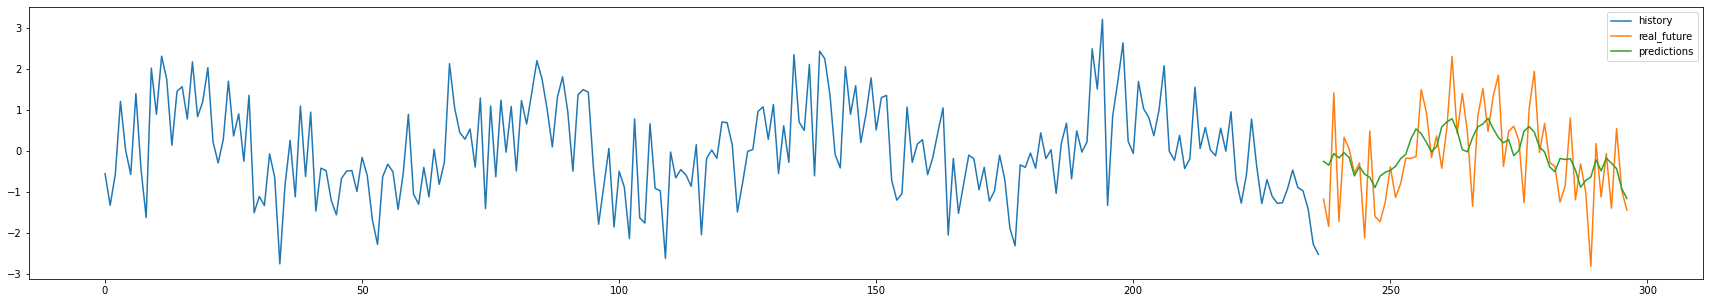

In [49]:
plt.plot(history, label='history')
plt.plot(real_future, label='real_future')
plt.plot(predictions, label='predictions')
plt.legend()

In [72]:
X_train.tail(1)

,0,1,2
236,-2.526678,-1.17893,-1.84411


In [71]:
X_test.head(1)

,0,1,2
237,-1.178931,-1.84411,1.41231


In [74]:
first_prediction = reg.predict(X_train.tail(1))
first_prediction

array([-1.05158812])

In [97]:
first_row = X_train.tail(1)
first_row

,0,1,2
236,-2.526678,-1.17893,-1.84411


In [75]:
predictions_df = pd.DataFrame([], columns=[str(x) for x in range(width)])
predictions_df

,0,1,2,3


In [94]:
# first_row = 
# X_train.tail(1)#.append(pd.Series(first_prediction)).reset_index(drop=True)


,0,1,2,0
236,-2.526678,-1.17893,-1.84411,NaN
0,NaN,NaN,NaN,-1.051588


In [87]:
new_row = X_train.tail(1).iloc[0, 1:].append(pd.Series(first_prediction)).reset_index(drop=True)
new_row

0   -1.17893
1   -1.84411
2   -1.05159
dtype: object

In [89]:
predictions_df.append(new_row, ignore_index=True)

,0,1,2,3,0,1,2
0,NaN,NaN,NaN,NaN,-1.178931,-1.844112,-1.051588
